In [4]:
from mykalshi import session, transport, formatting, market, events, trading
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="darkgrid")
%config InlineBackend.figure_format = 'retina'

In [5]:
import pandas as pd
markets_data = market.get_all_markets()
markets_df = pd.json_normalize(markets_data)

markets_df

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.School,custom_strike.Joins/Leaves,custom_strike.President,custom_strike.Epidemic Level,custom_strike.Joines/Leaves,custom_strike.Above,custom_strike.Inflation,custom_strike.Unemployment,custom_strike.Expo_Date,custom_strike.Interest Rate
0,KXNCAAF-26-GAST,KXNCAAF-26,binary,Will the Georgia St. win the College Football ...,,Georgia St.,Georgia St.,2025-07-12T00:00:00Z,2028-01-19T15:00:00Z,2026-01-19T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KXNCAAF-26-COLO,KXNCAAF-26,binary,Will the Colorado win the College Football Pla...,,Colorado,Colorado,2025-07-12T00:00:00Z,2028-01-19T15:00:00Z,2026-01-19T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KXNCAAF-26-GT,KXNCAAF-26,binary,Will the Georgia Tech win the College Football...,,Georgia Tech,Georgia Tech,2025-07-12T00:00:00Z,2028-01-19T15:00:00Z,2026-01-19T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KXNCAAF-26-UTEP,KXNCAAF-26,binary,Will the UTEP win the College Football Playoff...,,UTEP,UTEP,2025-07-12T00:00:00Z,2028-01-19T15:00:00Z,2026-01-19T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KXNCAAF-26-HOU,KXNCAAF-26,binary,Will the Houston win the College Football Play...,,Houston,Houston,2025-07-12T00:00:00Z,2028-01-19T15:00:00Z,2026-01-19T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140615,TEMP-21-T2.124,TEMP-21,binary,Will 2021 be the **hottest year on record**?,,Above 2.124° C,2.124° C or below,2021-07-02T14:00:00Z,2022-01-10T00:00:00Z,2021-07-02T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140616,HOME-21JUN-T750,HOME-21JUN,binary,"Will new U.S. home sales be above 750,000?",>750K,"Above 750,000","750,000 or below",2021-06-30T14:00:00Z,2021-07-25T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140617,GDP-21JUN30-T6.0,GDP-21JUN30,binary,Will real GDP increase by more than 6%?,>6%,Above 6%,6% or below,2021-06-30T14:00:00Z,2021-07-28T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140618,TRDDEFCN-21MAY-T30,TRDDEFCN-21MAY,binary,Will the US trade deficit in goods with China ...,>$30bn,Above $30 billion,$30 billion or below,2021-06-30T14:00:00Z,2021-07-01T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


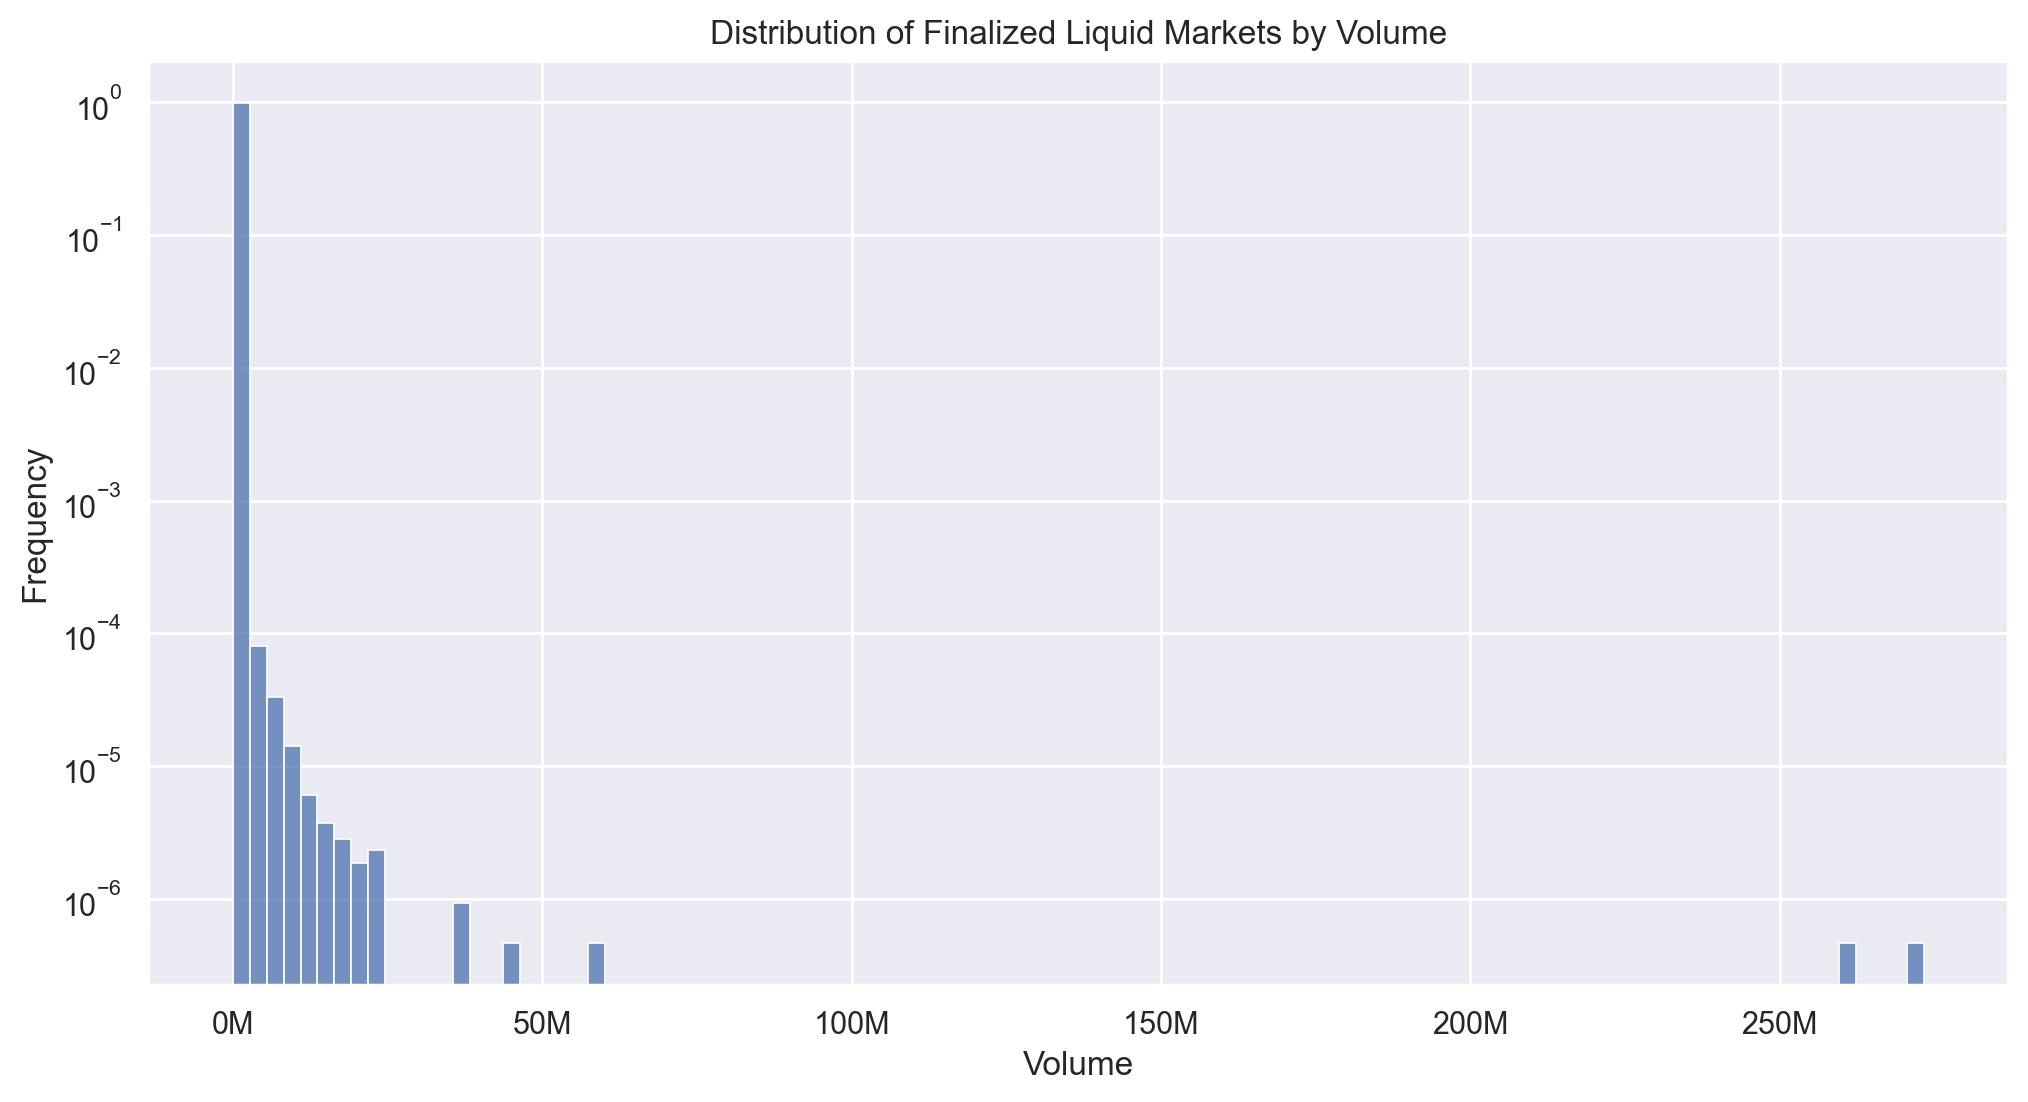

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data=markets_df, x='volume', bins=100, kde=False, stat='proportion')
plt.title('Distribution of Finalized Liquid Markets by Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.show()

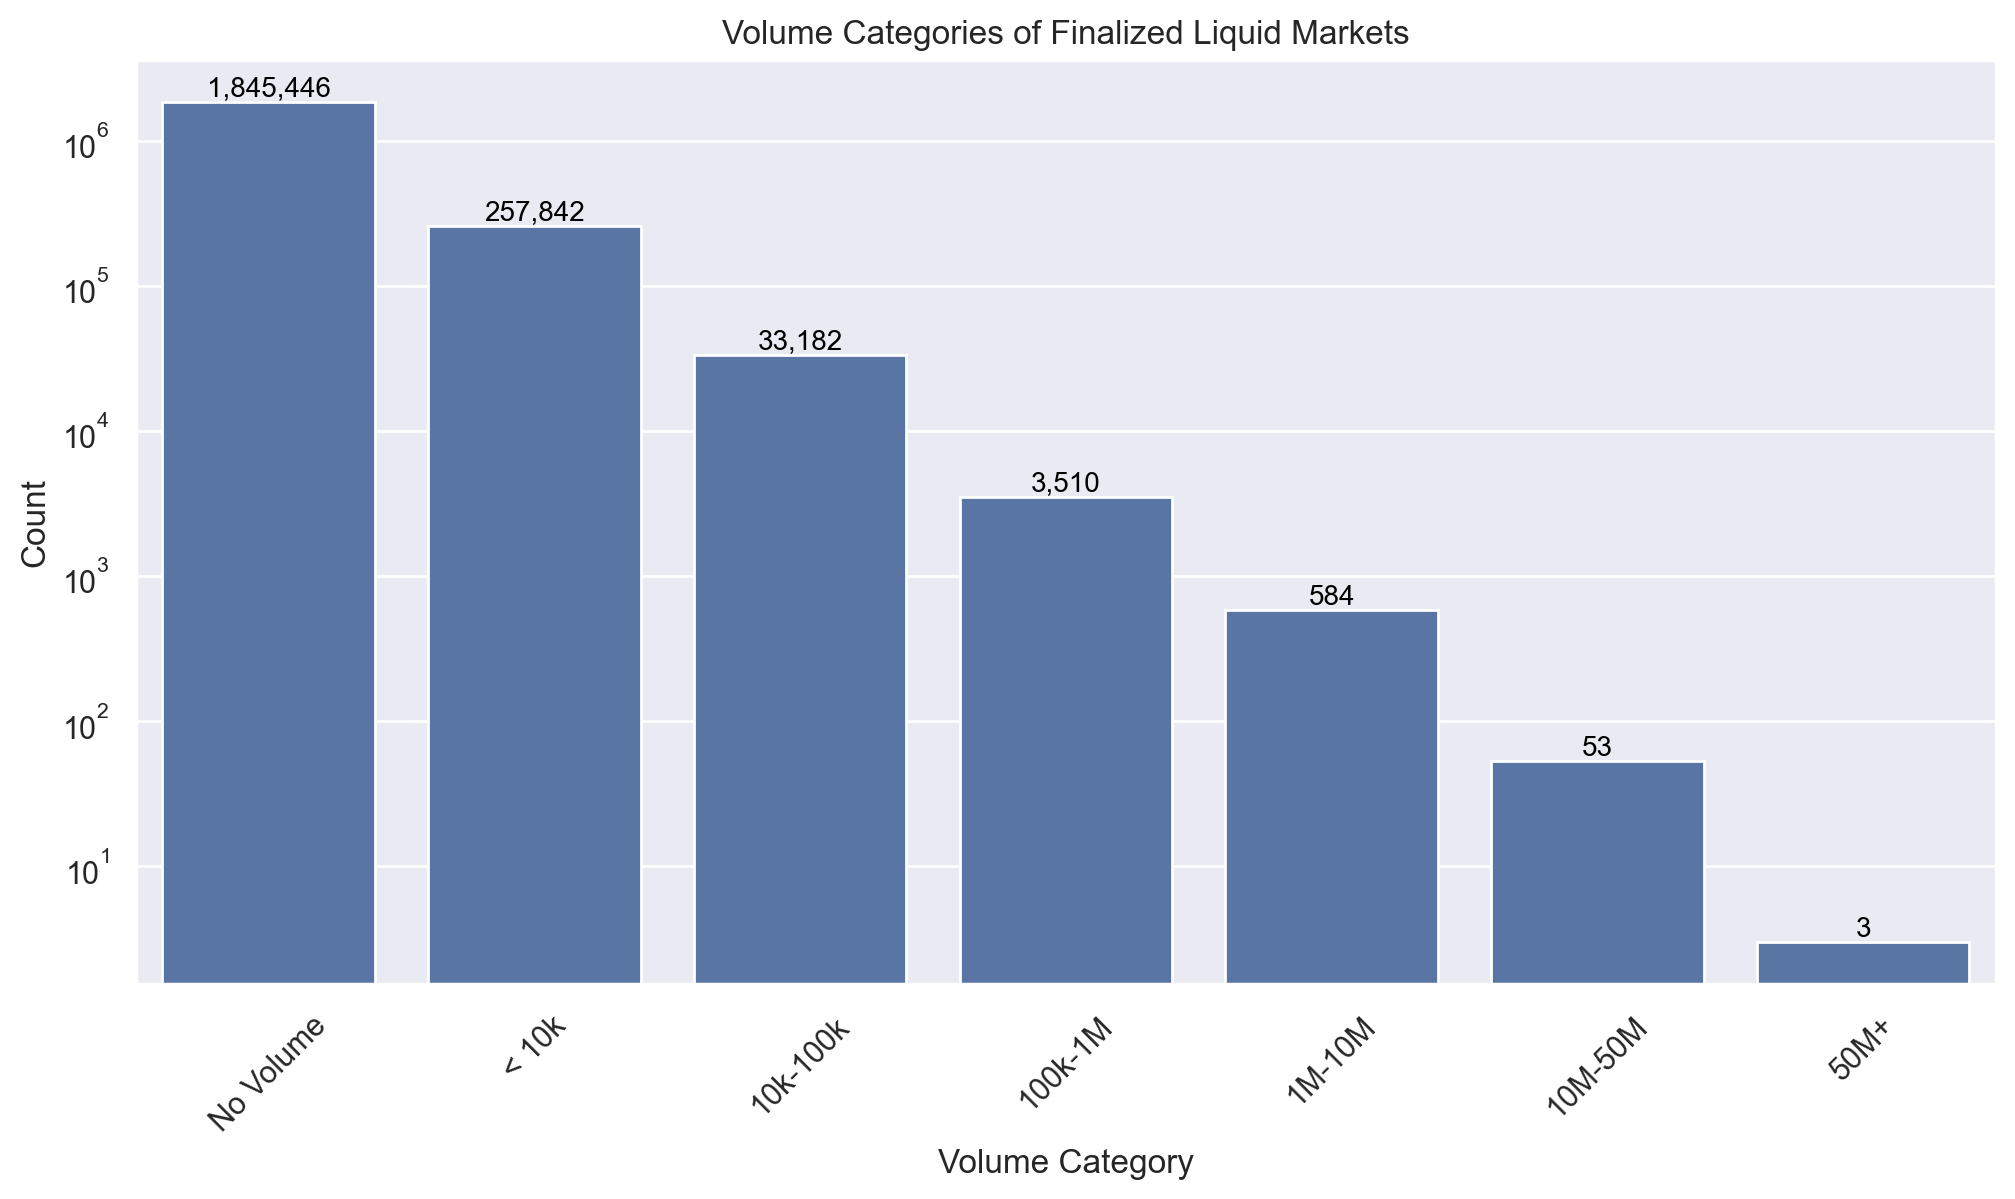

In [7]:
bins = [[0, 0.1], [0.1, 10000], [10000, 100000], [100000, 1000000], [1000000, 10000000], [10000000, 50000000], [50000000, 100000000000]]
bins_labels = ["No Volume", "< 10k", "10k-100k", "100k-1M", "1M-10M", "10M-50M", "50M+"]

def categorize_volume(volume):
    for i, (low, high) in enumerate(bins):
        if low <= volume < high:
            return f"{low}-{high}"
    return "Other"

markets_df['volume_category'] = markets_df['volume'].apply(categorize_volume)
plt.figure(figsize=(12, 6)) 
sns.countplot(data=markets_df, x='volume_category', order=sorted(markets_df['volume_category'].unique()))
# Override the x-tick labels to show ranges
plt.xticks(ticks=range(len(bins_labels)), labels=bins_labels, rotation=45)
# Add printed number on top of each bar (and formate them clearly with "," thousands separator)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', rotation=0)
plt.title('Volume Categories of Finalized Liquid Markets')
plt.xlabel('Volume Category')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [9]:
fin_liquid_markets = markets_df[(markets_df['status'] == "finalized") & (markets_df['volume'] > 500000)]
fin_liquid_markets = fin_liquid_markets.reset_index(drop=True)
# fin_liquid_markets.to_csv("FinalizedLiquidMarkets.csv", index=False)
fin_liquid_markets

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.Joins/Leaves,custom_strike.President,custom_strike.Epidemic Level,custom_strike.Joines/Leaves,custom_strike.Above,custom_strike.Inflation,custom_strike.Unemployment,custom_strike.Expo_Date,custom_strike.Interest Rate,volume_category
0,KXATPMATCH-25JUL11SINDJO-DJO,KXATPMATCH-25JUL11SINDJO,binary,Will Novak Djokovic be a winner of the semifin...,,Novak Djokovic,Novak Djokovic,2025-07-09T18:45:00Z,2025-07-11T18:00:53.109089Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
1,KXATPMATCH-25JUL11SINDJO-SIN,KXATPMATCH-25JUL11SINDJO,binary,Will Jannik Sinner be a winner of the semifina...,,Jannik Sinner,Jannik Sinner,2025-07-09T18:45:00Z,2025-07-11T18:00:53.109089Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
2,KXWTAMATCH-25JUL10BENSWI-SWI,KXWTAMATCH-25JUL10BENSWI,binary,Will Iga Swiatek be a winner of the semifinal ...,,Iga Swiatek,Iga Swiatek,2025-07-09T15:05:00Z,2025-07-10T17:15:19.053047Z,2025-07-10T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
3,KXWTAMATCH-25JUL10BENSWI-BEN,KXWTAMATCH-25JUL10BENSWI,binary,Will Belinda Bencic be a winner of the semifin...,,Belinda Bencic,Belinda Bencic,2025-07-09T15:05:00Z,2025-07-10T17:15:19.053047Z,2025-07-10T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
4,KXATPMATCH-25JUL11FRIALC-FRI,KXATPMATCH-25JUL11FRIALC,binary,Will Taylor Fritz be a winner of the semifinal...,,Taylor Fritz,Taylor Fritz,2025-07-08T18:05:00Z,2025-07-11T15:30:29.544767Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,FED-23MAY-T5.00,FED-23MAY,binary,Will the upper bound of the federal funds rate...,>5.00% :: 25+ bp hike,Above 5.00%,5.00% or below,2022-11-02T15:15:00Z,2023-05-03T17:55:00Z,2023-05-03T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
961,FED-23MAR-T5.00,FED-23MAR,binary,Will the upper bound of the federal funds rate...,>5.00% :: 50+ bp hike,Above 5.00%,5.00% or below,2022-10-17T14:00:00Z,2023-03-22T17:55:00Z,2023-03-22T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
962,FED-23MAR-T4.75,FED-23MAR,binary,Will the upper bound of the federal funds rate...,>4.75% :: 25+ bp hike,Above 4.75%,4.75% or below,2022-10-17T14:00:00Z,2023-03-22T17:55:00Z,2023-03-22T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
963,FED-22SEP-T3.00,FED-22SEP,binary,Will the federal funds rate be above 3.00% fol...,>3.00% :: 75bp hike or greater,Above 3.00%,3.00% or below,2022-06-14T15:15:00Z,2022-09-21T17:55:00Z,2022-09-27T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000


In [10]:
out = events.event_info("PRES-2024")
out["markets"]#, out["event_info"]

,market_ticker,yes_sub_title,range,strike_type,last_price,yes_bid,yes_ask,no_bid,no_ask,volume,open_time,close_time,status,rules_primary
0,PRES-2024-KH,Kamala Harris,:: or another Democrat,custom,1,0,1,99,100,273312857,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Kamala Harris or another representative of ...
1,PRES-2024-DJT,Donald Trump,:: or another Republican,None,99,99,100,0,1,262334207,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Donald Trump or another representative of t...
2,PRES-2024-RFK,Robert F. Kennedy Jr.,:: or another We the People nominee,custom,1,0,1,99,100,224361,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Robert F. Kennedy Jr. or another representa...
3,PRES-2024-JS,Jill Stein,:: or another Green Party nominee,custom,1,0,1,99,100,40394,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Jill Stein or another representative of the...
4,PRES-2024-CO,Chase Oliver,:: or another Libertarian,custom,1,0,1,99,100,20834,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Chase Oliver or another representative of t...
5,PRES-2024-CW,Cornel West,:: or another Justice for All nominee,custom,1,0,1,99,100,16290,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Cornel West or another representative of th...


In [11]:
results = {}

for mkt in out["markets"]["market_ticker"].values:
    cs_df = market.candlesticks_to_df(market.get_full_market(series_ticker="KXLLM1", ticker=mkt, period_interval='h', end_ts='11/10/2024'))[['end_period', 'yes_ask_close', 'yes_bid_close', 'volume']]
    
    cs_df['end_period'] = pd.to_datetime(cs_df['end_period'])
    cs_df['date'] = cs_df['end_period']
    cs_df['midval'] = (cs_df['yes_ask_close'] + cs_df['yes_bid_close']) / 2
    cs_df['ask'] = cs_df['yes_ask_close']
    cs_df['bid'] = cs_df['yes_bid_close']
    cs_df = cs_df.drop(columns=['yes_ask_close', 'yes_bid_close', 'end_period'])
    cs_df.set_index('date', inplace=True)
    title = out["markets"].loc[out["markets"]["market_ticker"] == mkt, "yes_sub_title"].values[0]
    # range = parse_range_string(range)

    results[title] = cs_df

# Step 1: Compute the global index (union of all datetime indices)
all_indices = sorted(set().union(*[df.index for df in results.values()]))
global_index = pd.DatetimeIndex(all_indices)

# Step 2: Build the full DataFrame with aligned index
results_df = pd.DataFrame(index=global_index)

# Step 3: Merge all time series, aligned on the global index
for title, df in results.items():
    df = df.groupby(df.index).mean()  # or .sum(), or use .duplicated() line

    renamed_df = df.rename(columns={
        'midval': f'{title}_midval',
        'ask': f'{title}_ask',
        'bid': f'{title}_bid',
        'volume': f'{title}_volume'
    })

    renamed_df = renamed_df.reindex(global_index)
    results_df = pd.concat([results_df, renamed_df], axis=1)

# results_df.ffill(inplace=True)
for col in results_df.columns:
    if '_midval' in col:
        vol_col = col.replace('_midval', '_volume')
        filled_series = results_df[col].copy()
        volume_series = results_df[vol_col]

        for i in range(1, len(filled_series)):
            if pd.isna(filled_series.iloc[i]) and pd.notna(volume_series.iloc[i-1]) and volume_series.iloc[i-1] > 200:
                filled_series.iloc[i] = filled_series.iloc[i - 1]

        results_df[col] = filled_series

# Step 4: Final computed columns
results_df['Vol'] = results_df[[col for col in results_df.columns if '_volume' in col]].sum(axis=1)
results_df['Tot'] = results_df[[col for col in results_df.columns if '_midval' in col]].sum(axis=1)

results_df.index.name = 'date'
results_df


,Kamala Harris_volume,Kamala Harris_midval,Kamala Harris_ask,Kamala Harris_bid,Donald Trump_volume,Donald Trump_midval,Donald Trump_ask,Donald Trump_bid,Robert F. Kennedy Jr._volume,Robert F. Kennedy Jr._midval,...,Chase Oliver_volume,Chase Oliver_midval,Chase Oliver_ask,Chase Oliver_bid,Cornel West_volume,Cornel West_midval,Cornel West_ask,Cornel West_bid,Vol,Tot
date,,,,,,,,,,,,,,,,,,,,,
2024-10-04 13:00:00,24083.0,50.5,51.0,50.0,39835.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.5,1.0,0.0,63919.0,100.5
2024-10-04 14:00:00,4330.0,50.5,51.0,50.0,3390.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7720.0,100.0
2024-10-04 15:00:00,6199.0,50.5,51.0,50.0,3382.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9581.0,100.0
2024-10-04 16:00:00,2814.0,50.5,51.0,50.0,3804.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6618.0,100.0
2024-10-04 17:00:00,8601.0,50.5,51.0,50.0,21784.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30385.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-09 20:00:00,21514.0,1.5,2.0,1.0,54705.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76219.0,99.0
2024-11-09 21:00:00,56499.0,1.5,2.0,1.0,77001.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133500.0,99.0
2024-11-09 22:00:00,94528.0,1.5,2.0,1.0,41228.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135756.0,99.0


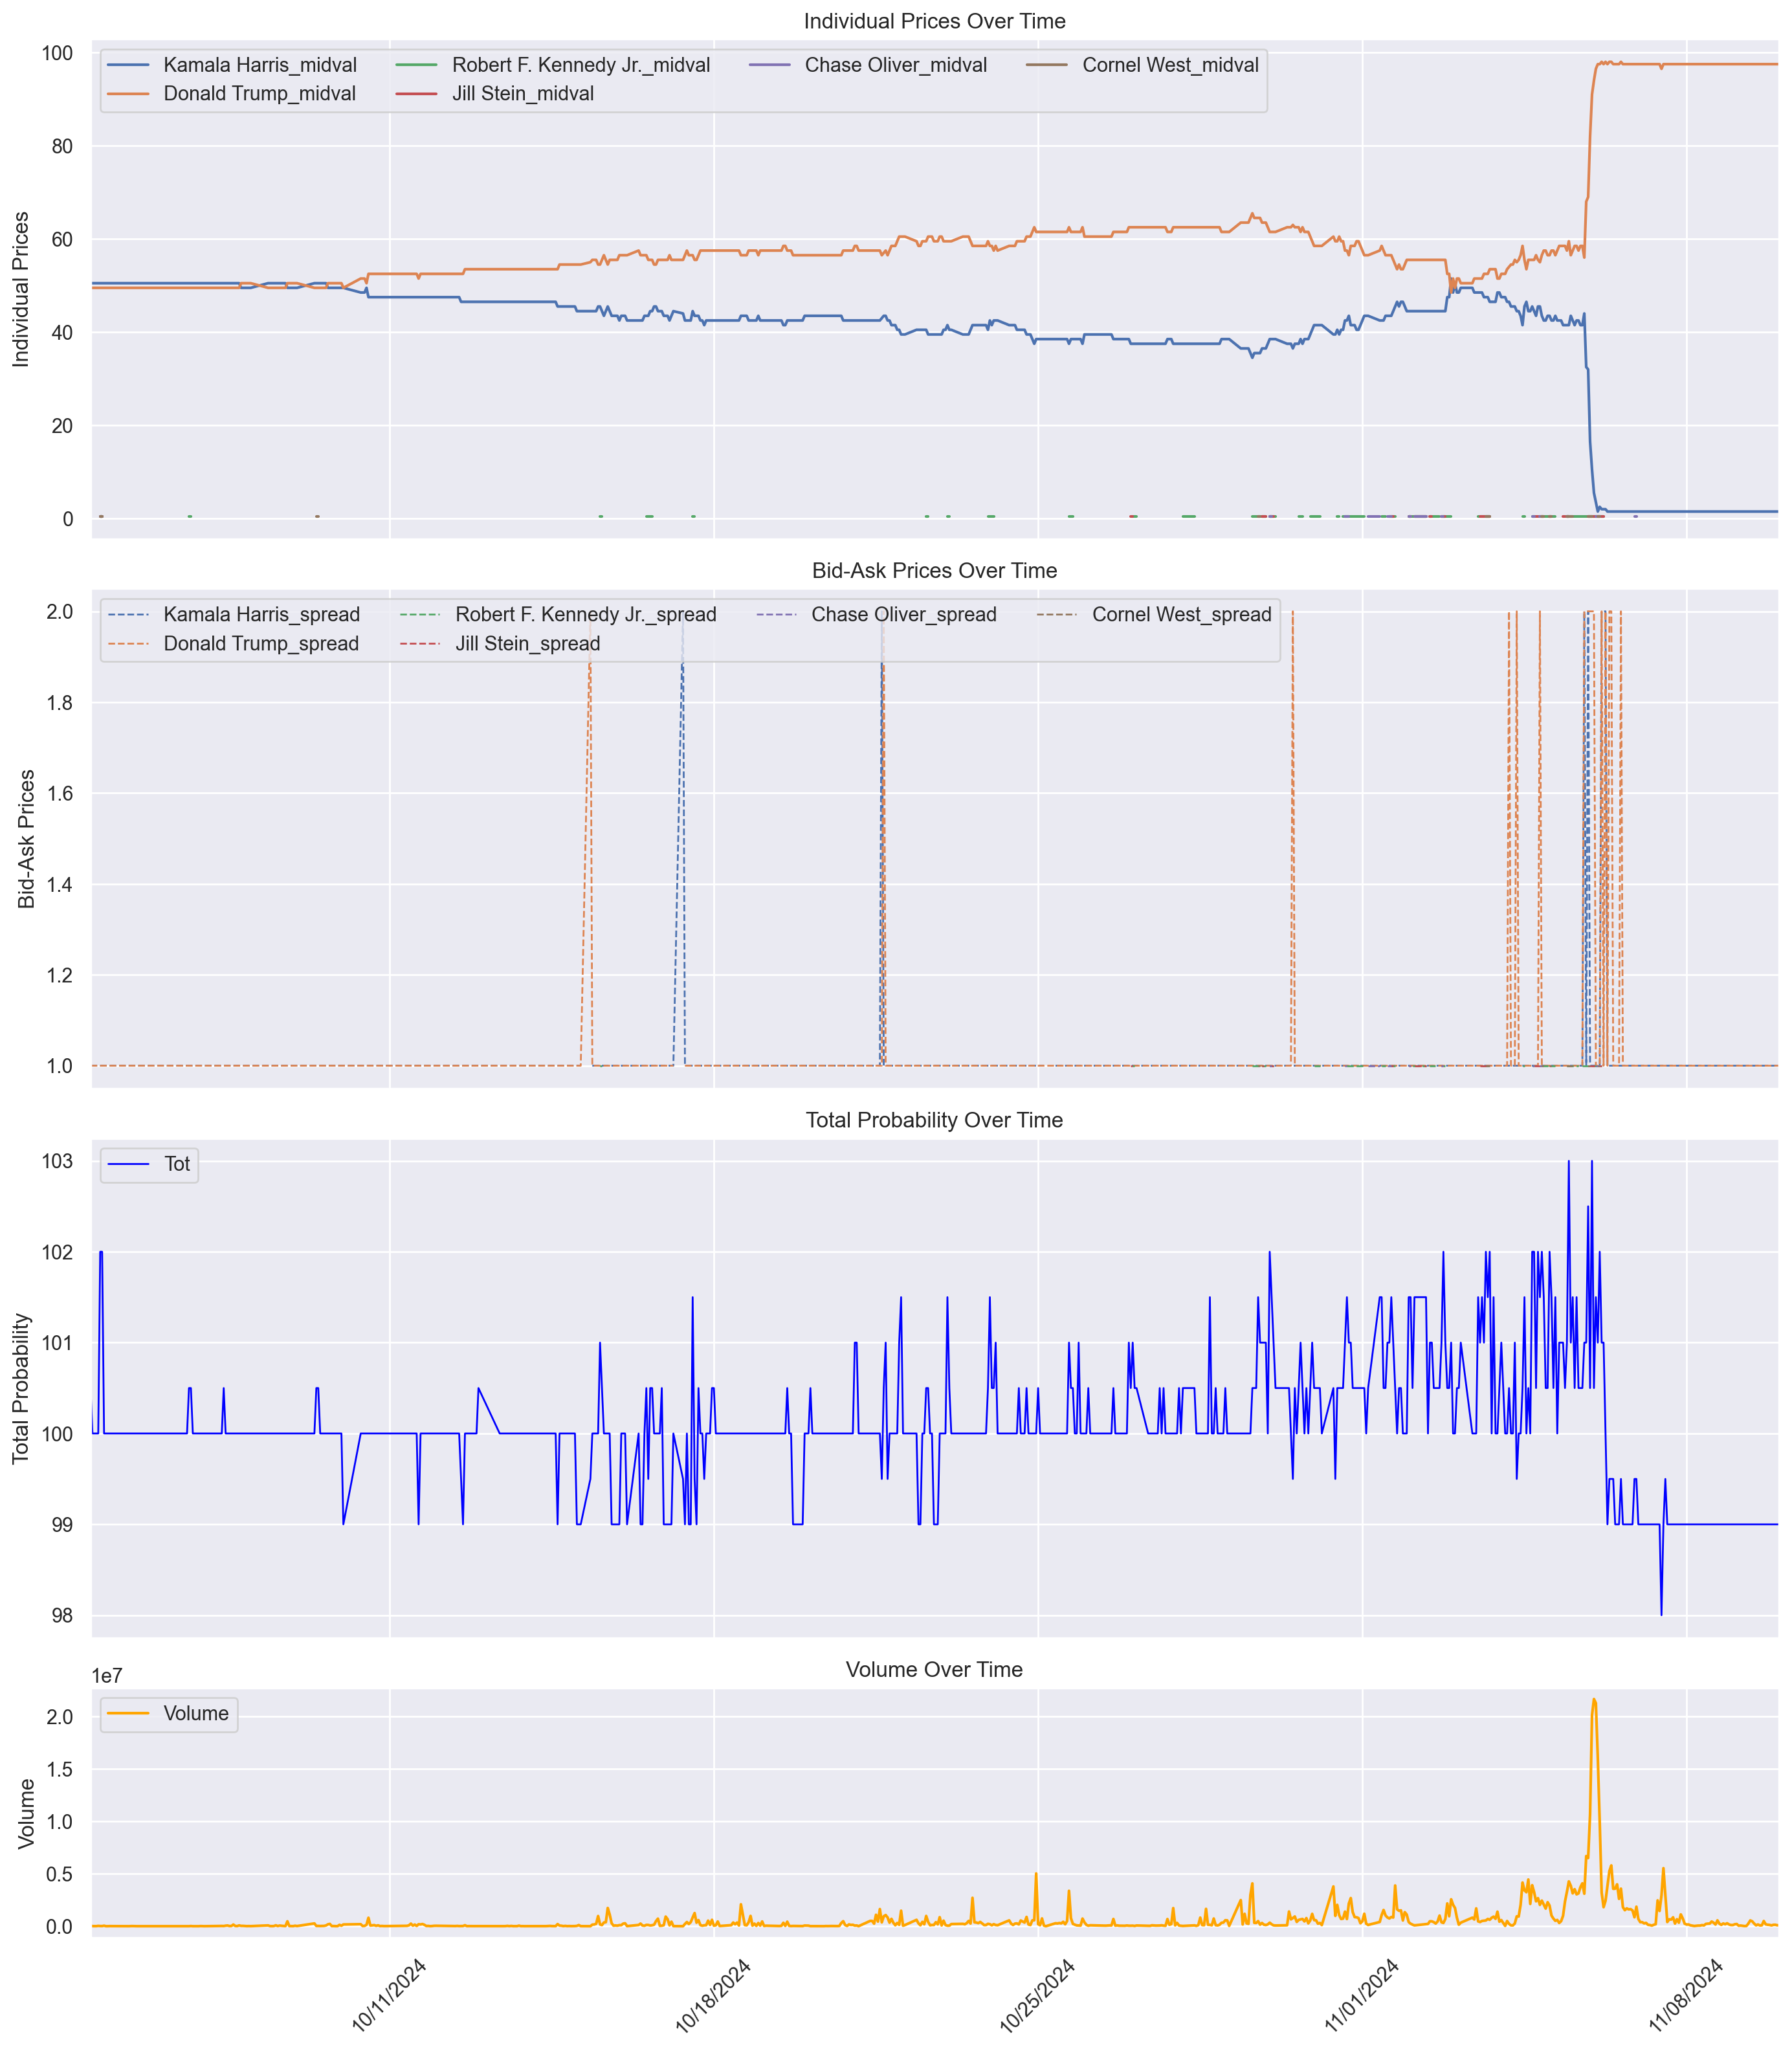

In [12]:
plot_df = results_df.reset_index()

# Identify price columns (all columns except 'date', 'Tot', and 'Vol')
price_columns = [col for col in plot_df.columns if "_midval" in col]

# Create a figure with 3 subplots, making the top two price plots the same size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(14, 16), 
                                    gridspec_kw={'height_ratios': [2, 2, 2, 1]}, 
                                    sharex=True)

# Plot 1: Individual Prices
for col in price_columns:
    ax1.plot(plot_df['date'], plot_df[col], linewidth=1.5, label=col)
ax1.set_ylabel('Individual Prices')
ax1.set_title('Individual Prices Over Time')
ax1.legend(loc='upper left', ncol=min(4, len(price_columns)))
ax1.grid(True)
plt.setp(ax1.get_xticklabels(), visible=False)

# Plot 2: Bid-Ask Prices
for col in price_columns:
    ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_ask')] - plot_df[col.replace('_midval', '_bid')], linestyle='--', linewidth=1, label=col.replace('_midval', '_spread'))
    # ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_bid')], linestyle=':', linewidth=1, label=col.replace('_midval', '_bid'))
ax2.set_ylabel('Bid-Ask Prices')
ax2.set_title('Bid-Ask Prices Over Time')
ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
ax2.grid(True)
plt.setp(ax2.get_xticklabels(), visible=False)

# selected_outcome = 'Donald Trump'

# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_ask'], linestyle='--', linewidth=1, label=selected_outcome + '_ask')
# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_bid'], linestyle=':', linewidth=1, label=selected_outcome + '_bid')
# ax2.set_ylabel('Bid-Ask Prices')
# ax2.set_title('Bid-Ask Prices Over Time')
# ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
# ax2.grid(True)
# plt.setp(ax2.get_xticklabels(), visible=False)

# Plot 3: Total Probability
ax3.plot(plot_df['date'], plot_df['Tot'], color='blue', linewidth=1, label='Tot')
ax3.set_ylabel('Total Probability')
ax3.set_title('Total Probability Over Time')
ax3.legend(loc='upper left')
ax3.grid(True)
plt.setp(ax3.get_xticklabels(), visible=False)

# Calculate appropriate width for bars
if plot_df.shape[0] > 1:
    time_diff = (plot_df['date'].iloc[1] - plot_df['date'].iloc[0]).total_seconds()
    width_in_days = (time_diff / (24 * 60 * 60)) * 0.8
else:
    width_in_days = 0.01

# Plot 4: Volume
ax4.plot(plot_df['date'], plot_df['Vol'], color='orange', label='Volume')
ax4.set_ylabel('Volume')
ax4.set_title('Volume Over Time')
ax4.legend(loc='upper left')
ax4.grid(True)

# Format only the bottom x-axis with more compact labels
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

# Adjust the x-axis limits to match your data range
date_min = plot_df['date'].min()
date_max = plot_df['date'].max()
ax4.set_xlim(date_min, date_max)

plt.tight_layout()
plt.show()

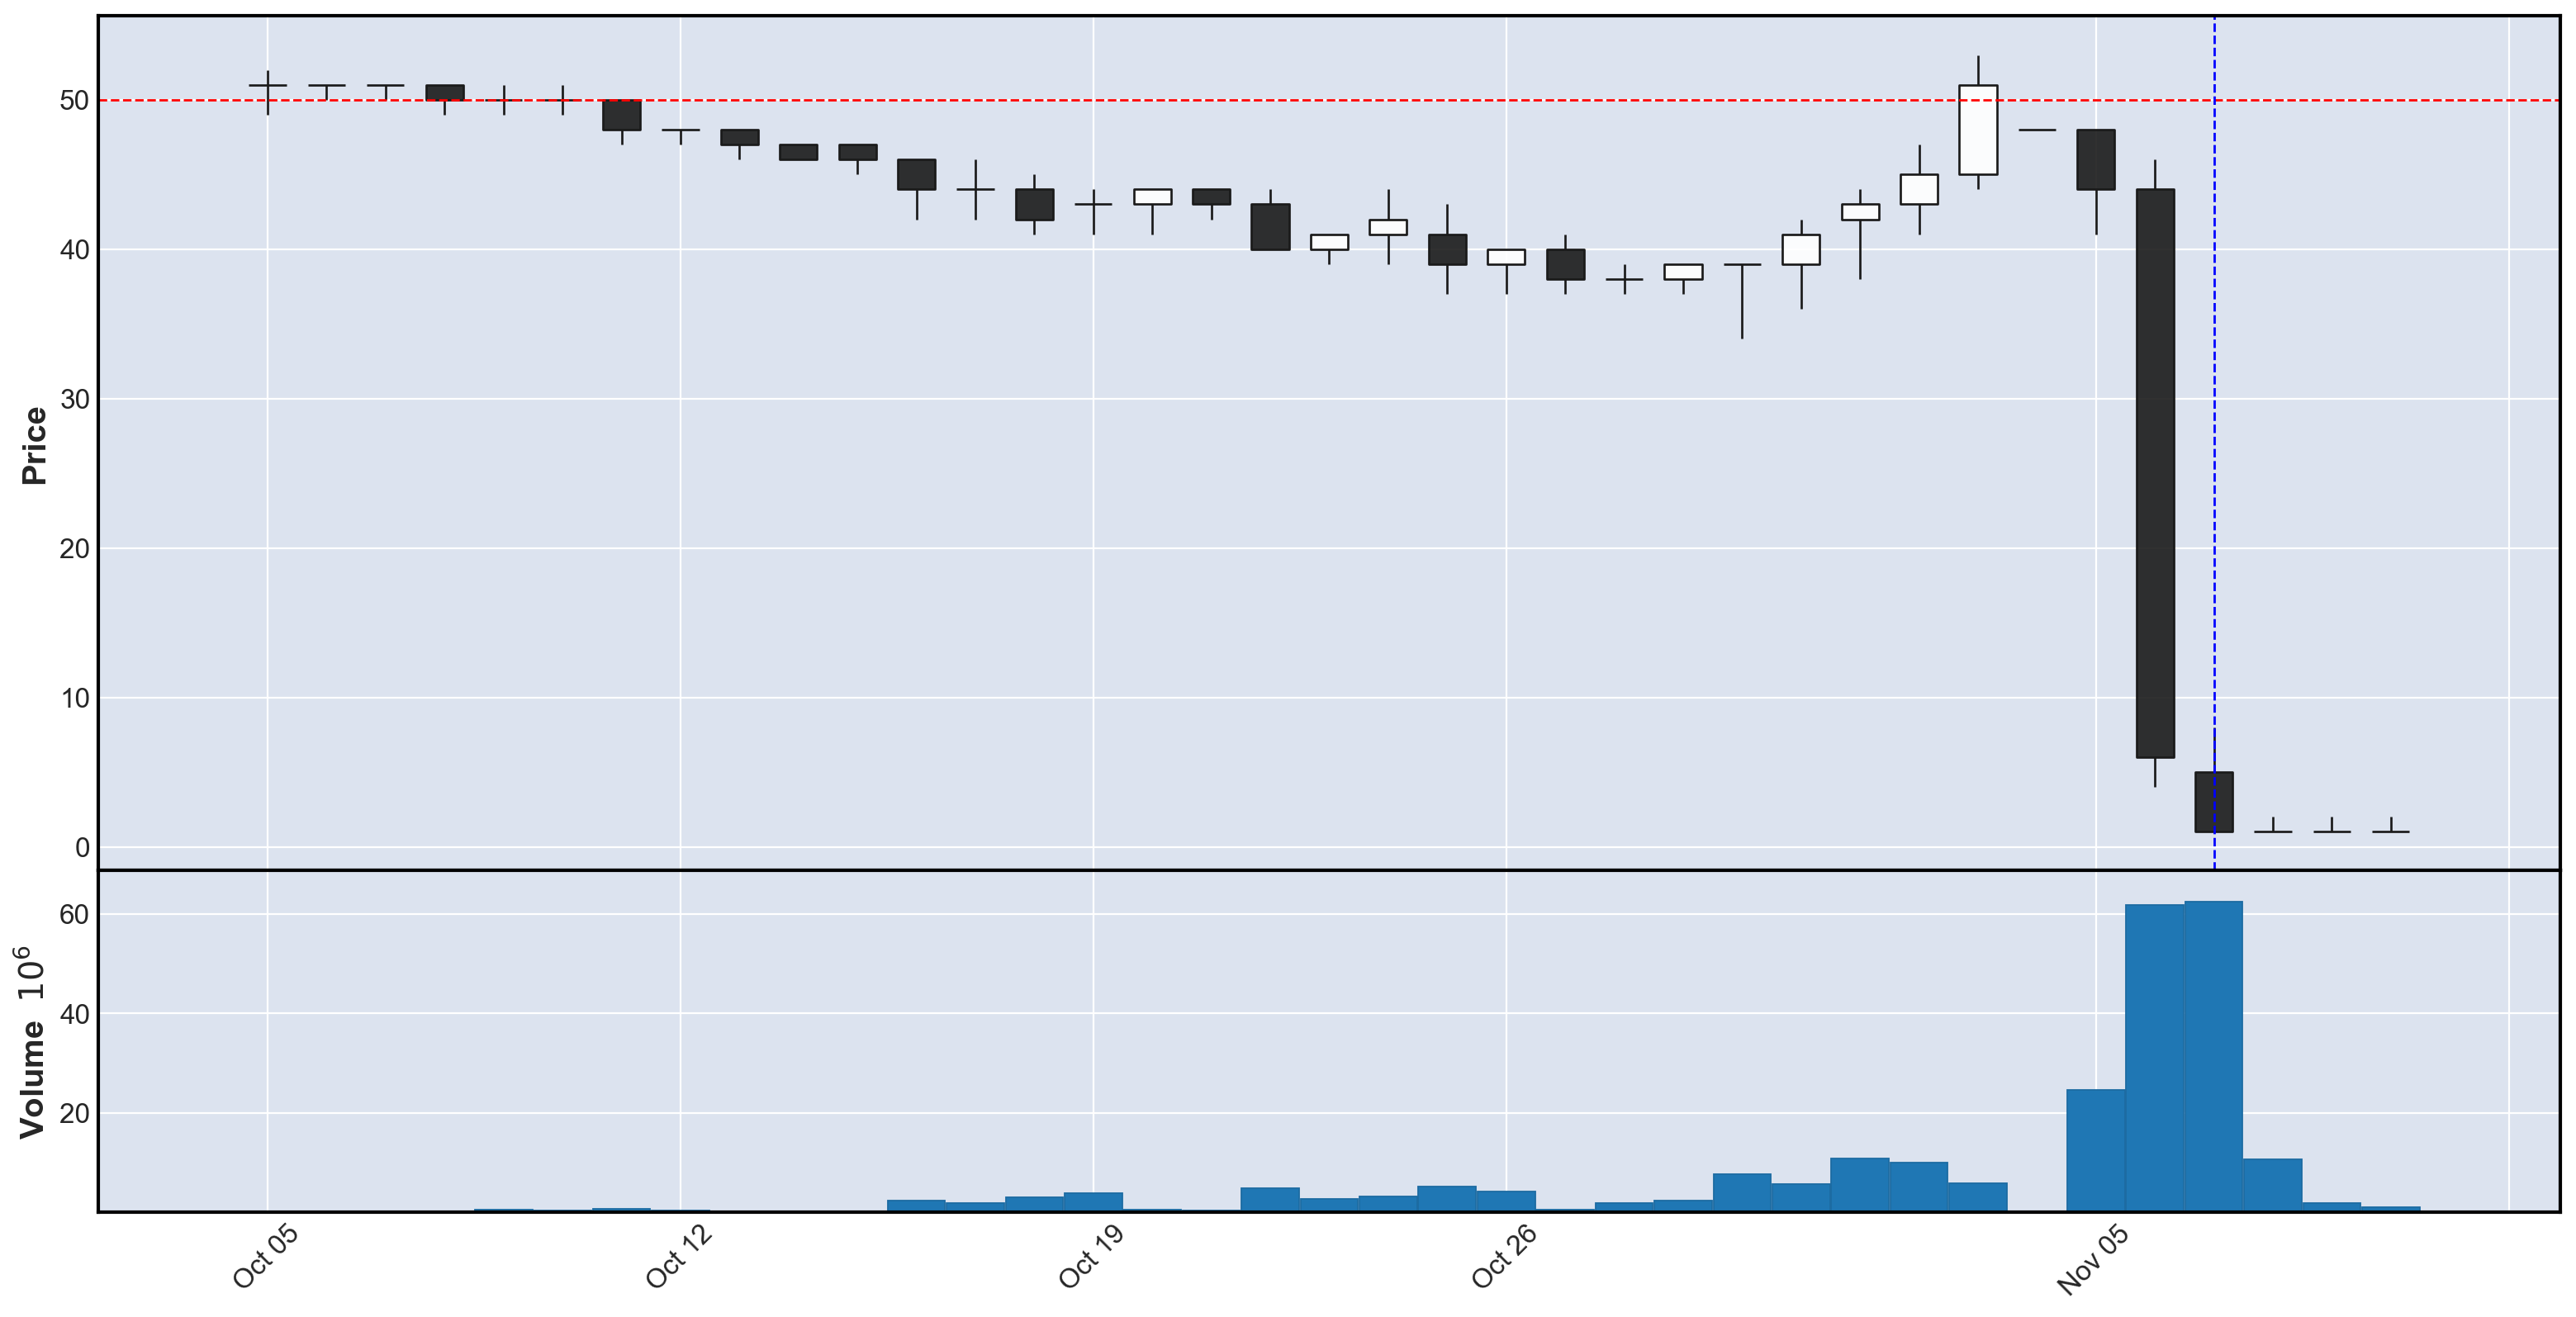

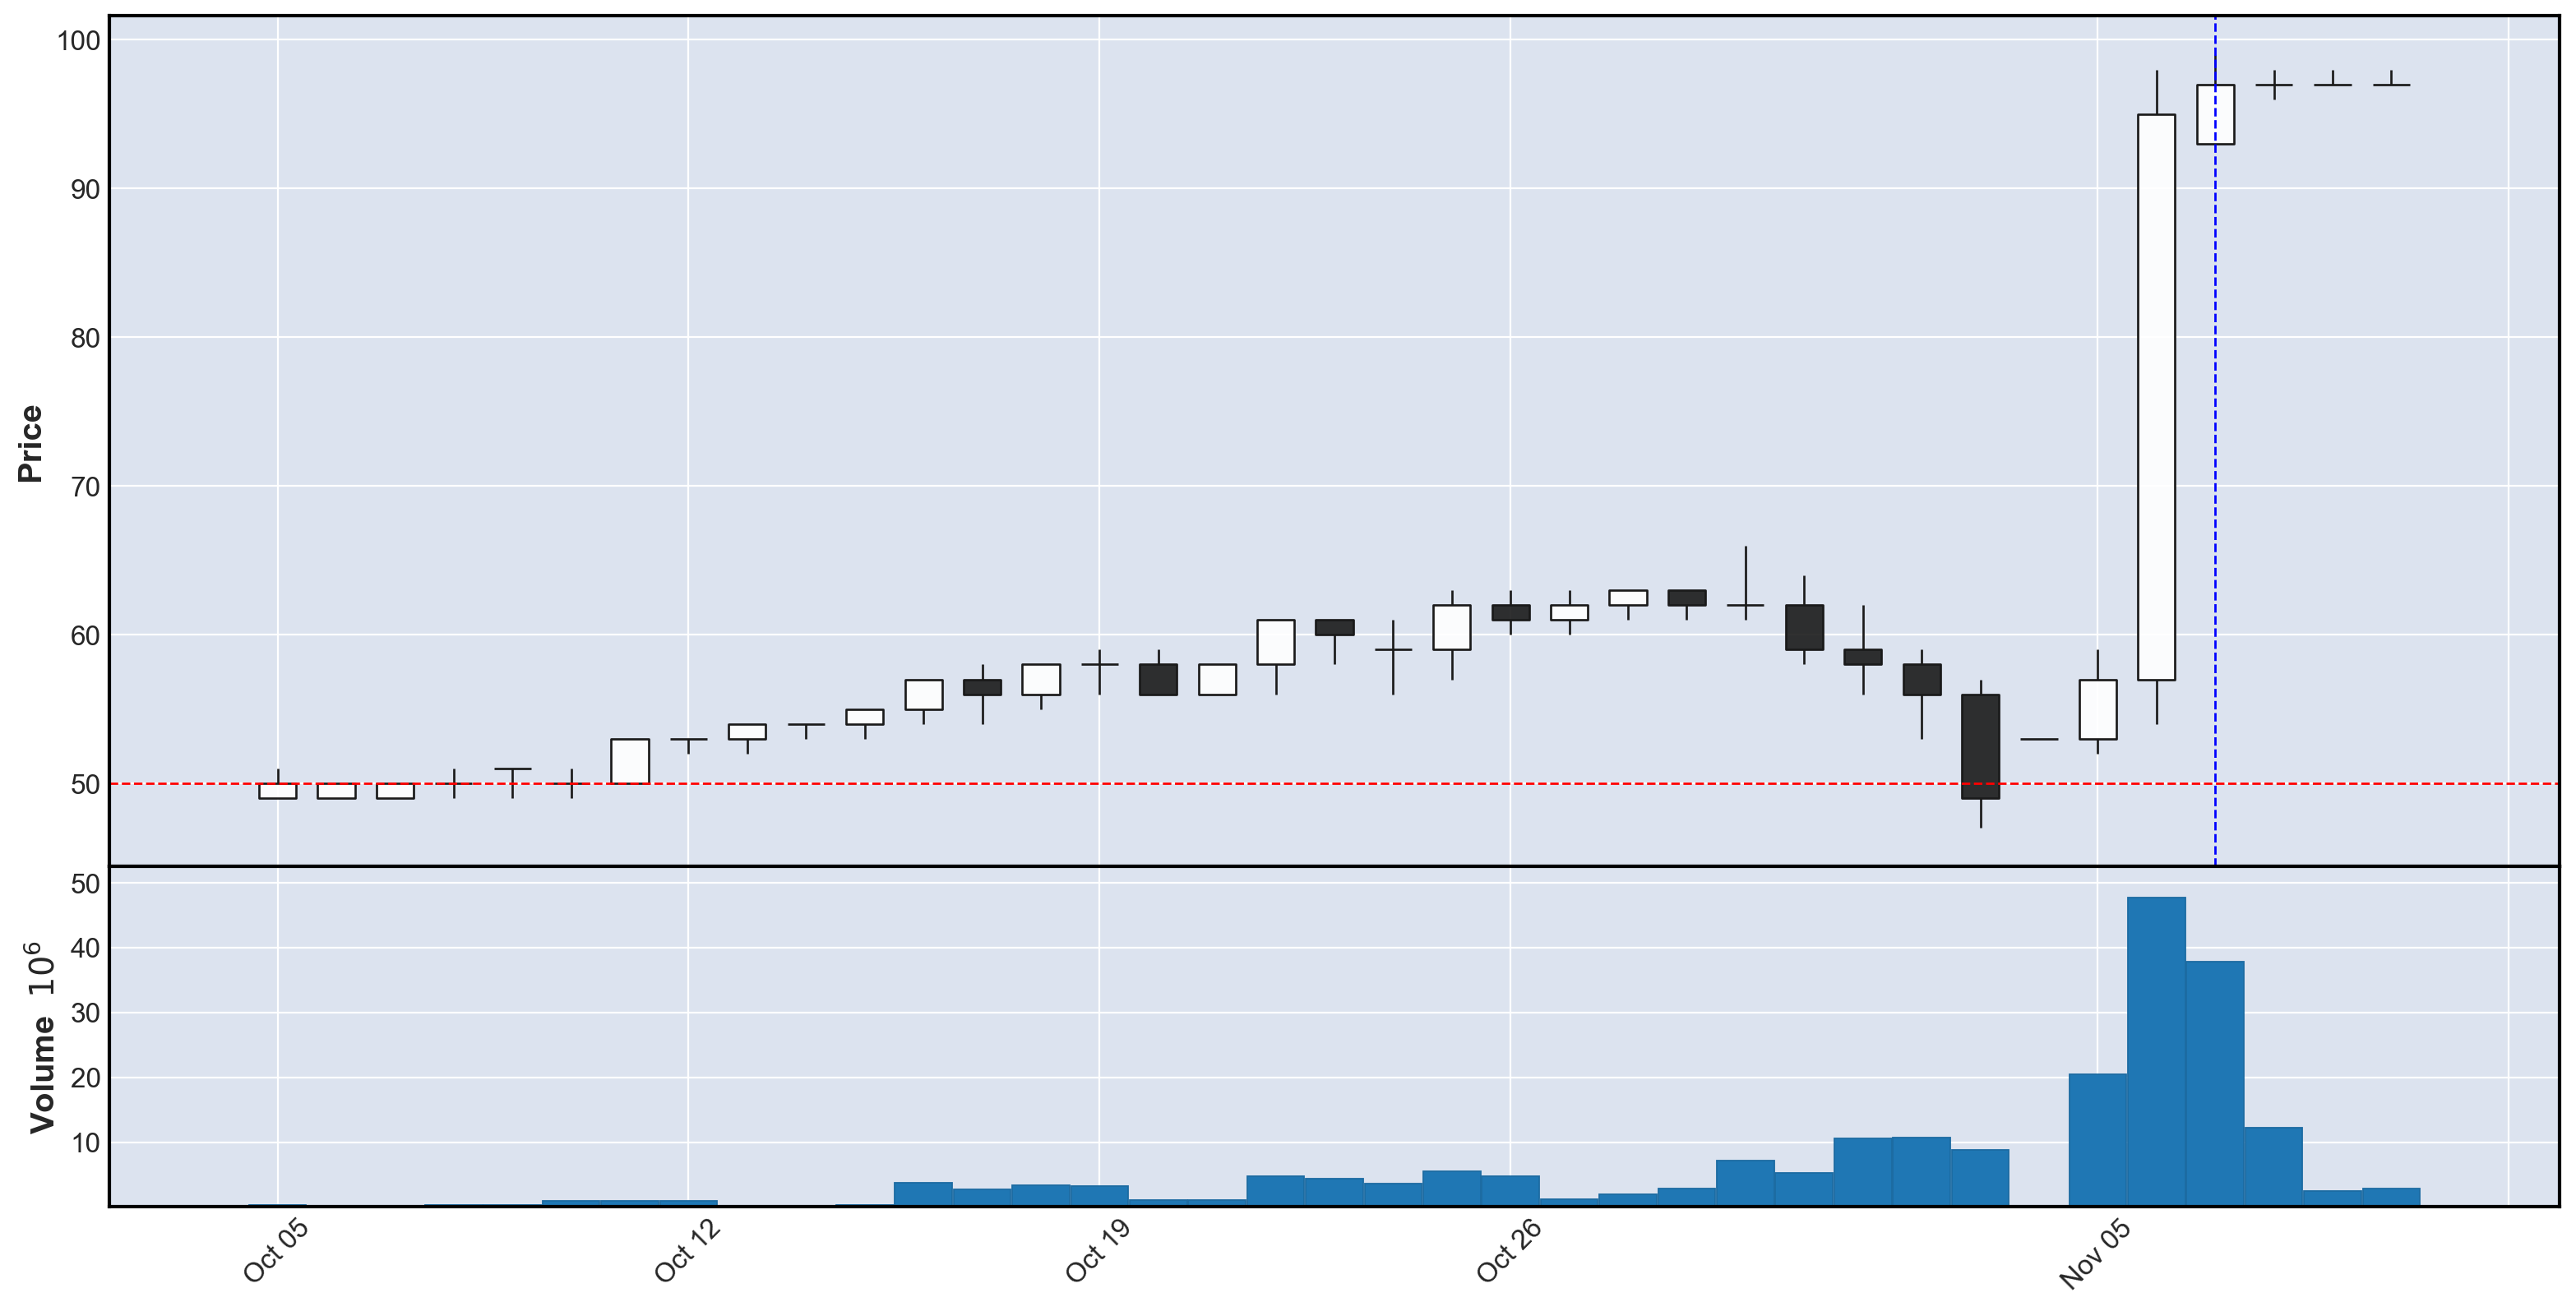

In [13]:
pres_djt_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-DJT",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)

pres_kh_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-KH",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)
djt_df = market.candlesticks_to_df(pres_djt_data)
kh_df = market.candlesticks_to_df(pres_kh_data)

djt_candlestick_df = market.build_candlestick(pres_djt_data)
kh_candlestick_df = market.build_candlestick(pres_kh_data)

fig, axes = mpf.plot(
    kh_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Set y-axis limits for the price chart (first axes object)
# axes[0].set_ylim(0, 60)  # customize as needed

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here


fig, axes = mpf.plot(
    djt_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here

In [ ]:
open_mkts = pd.json_normalize(market.get_all_markets(status="open", batch_size=100))
open_mkts

In [65]:
orderbook = market.get_market_orderbook(ticker="KXFEDDECISION-25JUL-C25")["orderbook"]
yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

print("\nBids:")
for price, qty in yes_bids:
    print(f"  YES @ {price}¢ × {qty} contracts")

print("Asks:")
for price, qty in yes_asks:
    print(f"  YES @ {price}¢ × {qty} contracts")


Bids:
  YES @ 1¢ × 1010500 contracts
  YES @ 2¢ × 708096 contracts
  YES @ 3¢ × 500752 contracts
  YES @ 4¢ × 568492 contracts
Asks:
  YES @ 6¢ × 875993 contracts
  YES @ 7¢ × 701246 contracts
  YES @ 8¢ × 7500 contracts
  YES @ 9¢ × 4655 contracts
  YES @ 10¢ × 161 contracts
  YES @ 11¢ × 1000 contracts
  YES @ 12¢ × 18374 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 350 contracts
  YES @ 16¢ × 5544 contracts
  YES @ 17¢ × 2972 contracts
  YES @ 18¢ × 1146 contracts
  YES @ 19¢ × 1477 contracts
  YES @ 20¢ × 1729 contracts
  YES @ 21¢ × 1904 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 29¢ × 50 contracts
  YES @ 35¢ × 1 contracts
  YES @ 44¢ × 500 contracts
  YES @ 48¢ × 107 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22550 contracts
  YES @ 55¢ × 1500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2000 contracts
  YES @ 95¢ × 902 contracts
  YES @ 96¢ × 4000 contracts
  YES @ 97¢ × 30700 contracts
  YES @ 9

In [76]:
ask_prices = [p for p, _ in yes_asks]
ask_sizes = [q for _, q in yes_asks]
ask_cum = list(np.cumsum(ask_sizes))

bid_prices = [p for p, _ in yes_bids]
bid_sizes = [q for _, q in yes_bids]
bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

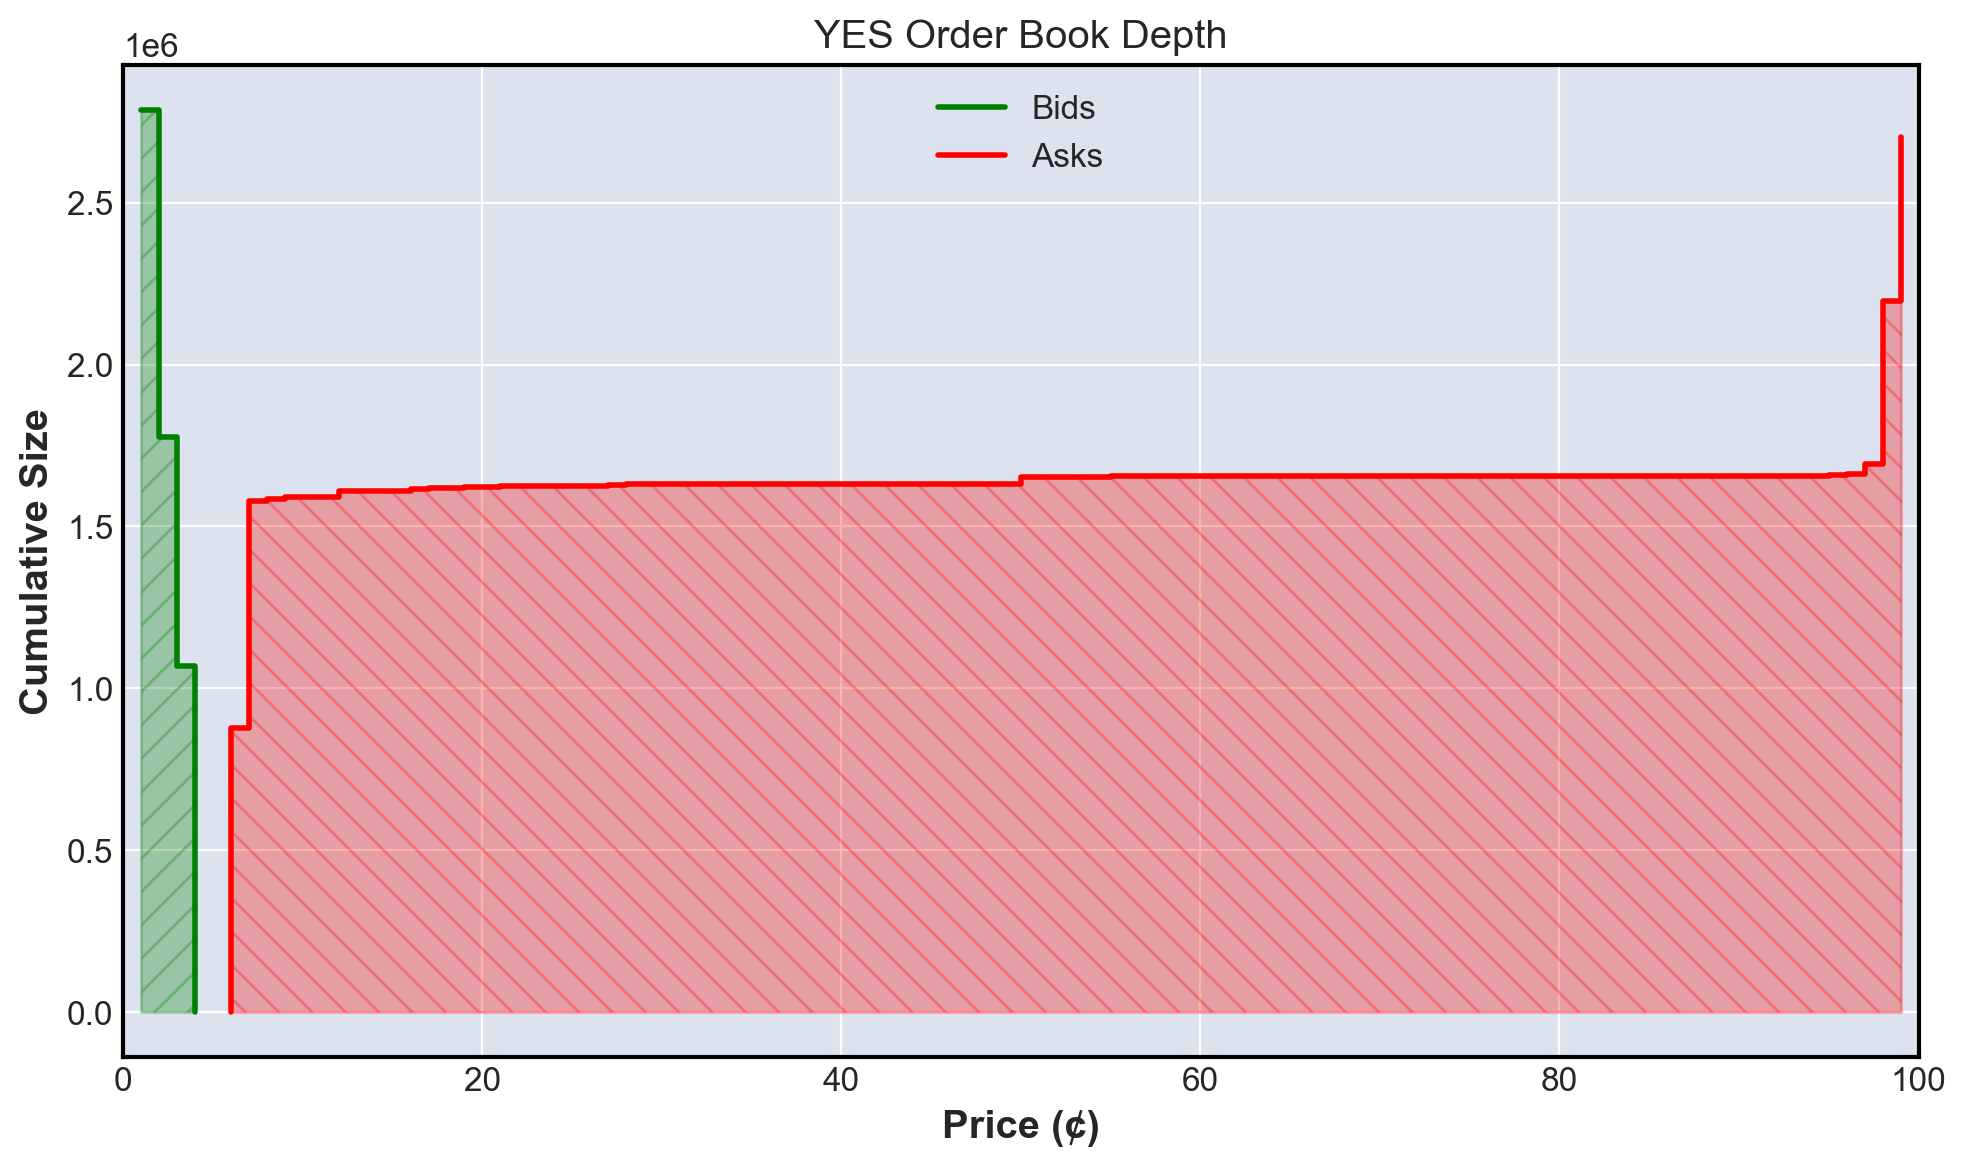

In [80]:
# Duplicate the last point at the end of each side — at same price, with volume = 0
bid_prices_ext = bid_prices + [bid_prices[-1]]
bid_cum_ext = bid_cum + [0]

ask_prices_ext = [ask_prices[0]] + ask_prices
ask_cum_ext = [0] + ask_cum

# Plot
plt.figure(figsize=(10, 6))
plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

plt.xlabel("Price (¢)")
plt.ylabel("Cumulative Size")
plt.title("YES Order Book Depth")
plt.legend(loc="upper center")
plt.xlim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
def get_market_lob(ticker):
    orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
    yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
    yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

    print("\nBids:")
    for price, qty in yes_bids:
        print(f"  YES @ {price}¢ × {qty} contracts")

    print("Asks:")
    for price, qty in yes_asks:
        print(f"  YES @ {price}¢ × {qty} contracts")

def plot_market_lob(ticker):
    orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
    yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
    yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

    ask_prices = [p for p, _ in yes_asks]
    ask_sizes = [q for _, q in yes_asks]
    ask_cum = list(np.cumsum(ask_sizes))

    bid_prices = [p for p, _ in yes_bids]
    bid_sizes = [q for _, q in yes_bids]
    bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

    bid_prices_ext = bid_prices + [bid_prices[-1]]
    bid_cum_ext = bid_cum + [0]

    ask_prices_ext = [ask_prices[0]] + ask_prices
    ask_cum_ext = [0] + ask_cum

    plt.figure(figsize=(10, 6))
    plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
    plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

    plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
    plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

    plt.xlabel("Price (¢)")
    plt.ylabel("Cumulative Size")
    plt.title("YES Order Book Depth")
    plt.legend(loc="upper center")
    plt.xlim(0, 100)
    plt.grid(True)

    import matplotlib.ticker as mticker
    max_val = max(max(bid_cum_ext, default=0), max(ask_cum_ext, default=0))
    if max_val >= 1_000_000:
        divisor = 1_000_000
        suffix = "M"
    elif max_val >= 1_000:
        divisor = 1_000
        suffix = "K"
    else:
        divisor = 1
        suffix = ""

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

    plt.tight_layout()
    plt.show()

In [95]:
get_market_lob("KXFEDDECISION-25JUL-C25")


Bids:
  YES @ 1¢ × 1010500 contracts
  YES @ 2¢ × 708096 contracts
  YES @ 3¢ × 500637 contracts
  YES @ 4¢ × 568370 contracts
Asks:
  YES @ 6¢ × 874280 contracts
  YES @ 7¢ × 703806 contracts
  YES @ 8¢ × 7500 contracts
  YES @ 9¢ × 4959 contracts
  YES @ 10¢ × 161 contracts
  YES @ 11¢ × 1000 contracts
  YES @ 12¢ × 18374 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 385 contracts
  YES @ 16¢ × 7599 contracts
  YES @ 17¢ × 1069 contracts
  YES @ 18¢ × 1261 contracts
  YES @ 19¢ × 1625 contracts
  YES @ 20¢ × 1902 contracts
  YES @ 21¢ × 2095 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 29¢ × 50 contracts
  YES @ 35¢ × 1 contracts
  YES @ 44¢ × 500 contracts
  YES @ 48¢ × 107 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22550 contracts
  YES @ 55¢ × 1500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2000 contracts
  YES @ 95¢ × 902 contracts
  YES @ 96¢ × 4000 contracts
  YES @ 97¢ × 30700 contracts
  YES @ 9

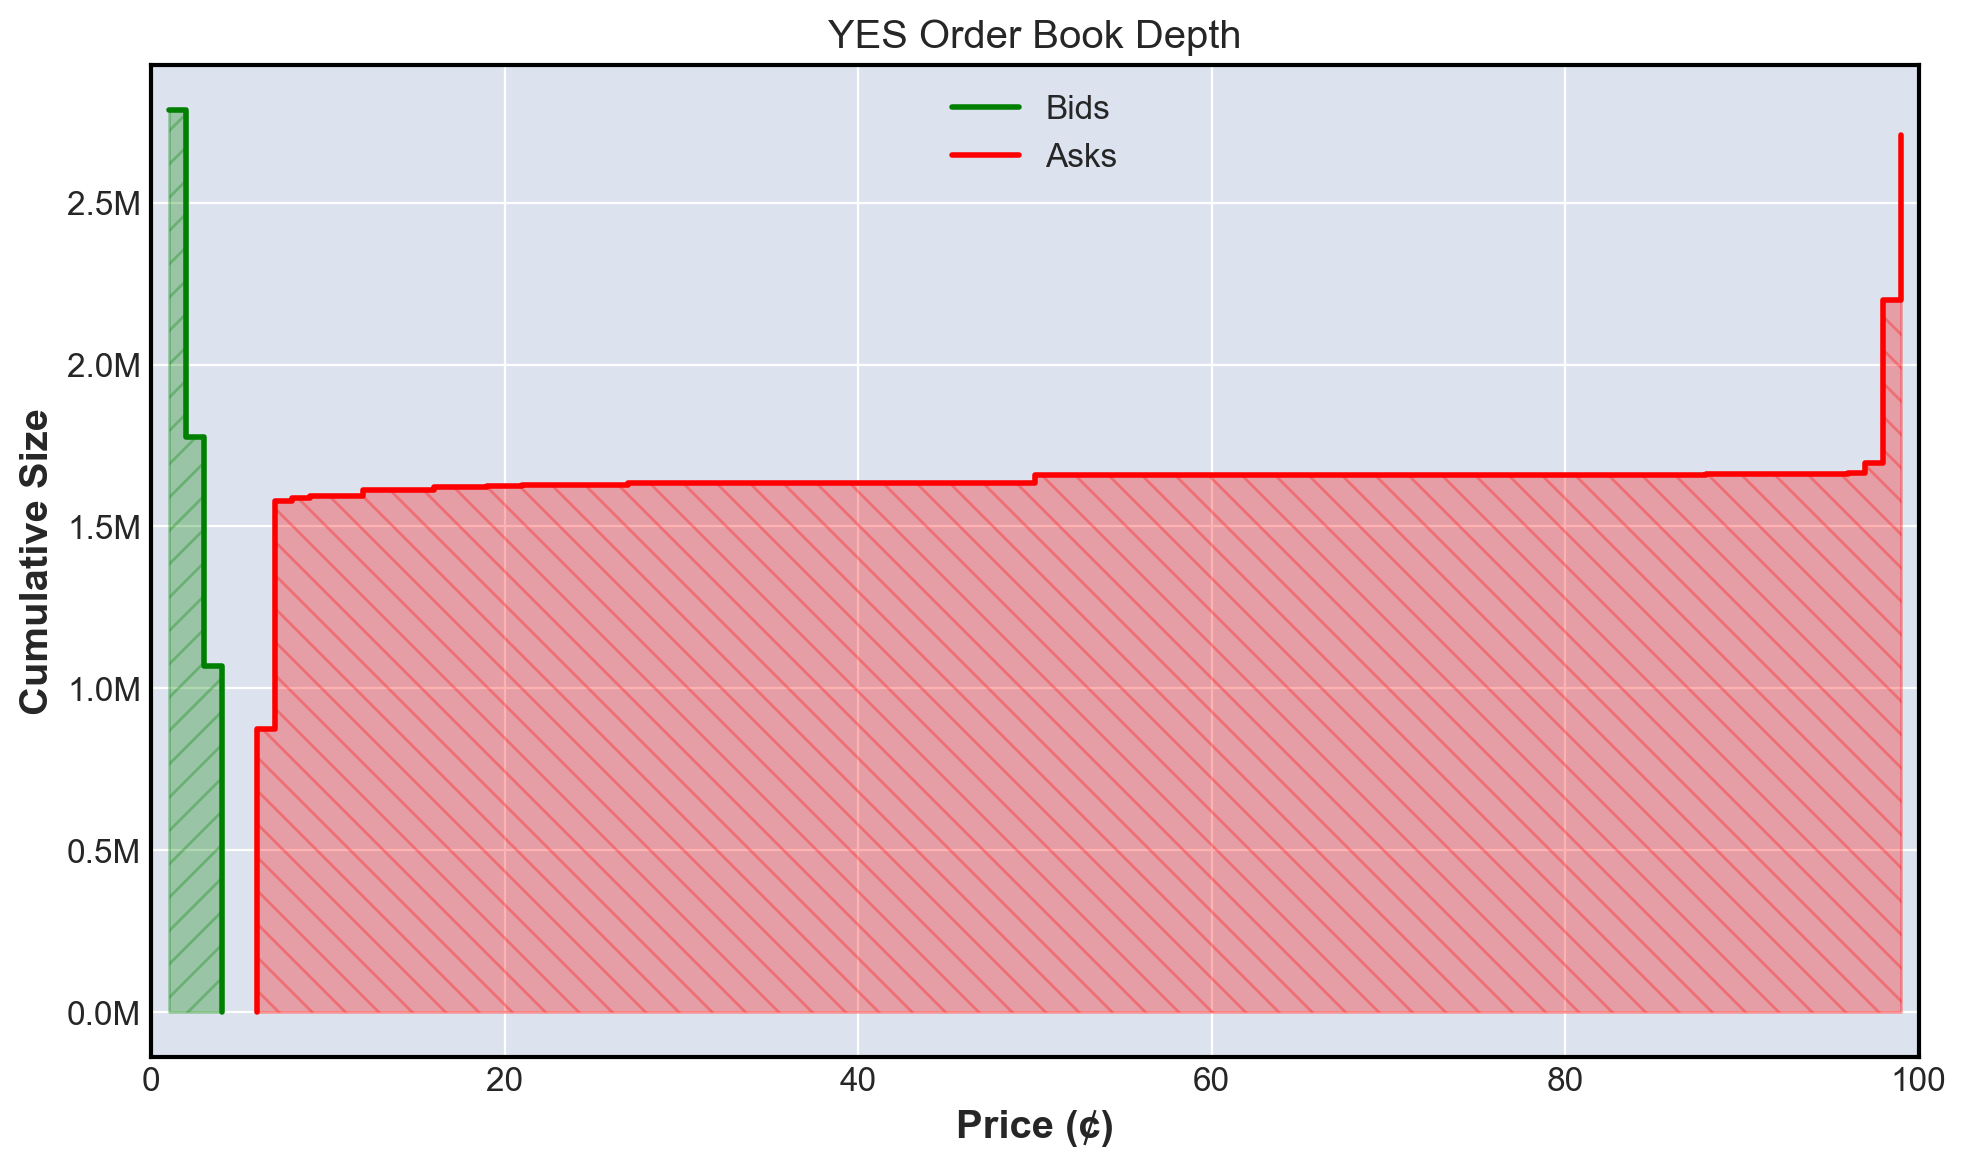

In [97]:
plot_market_lob("KXFEDDECISION-25JUL-C25")

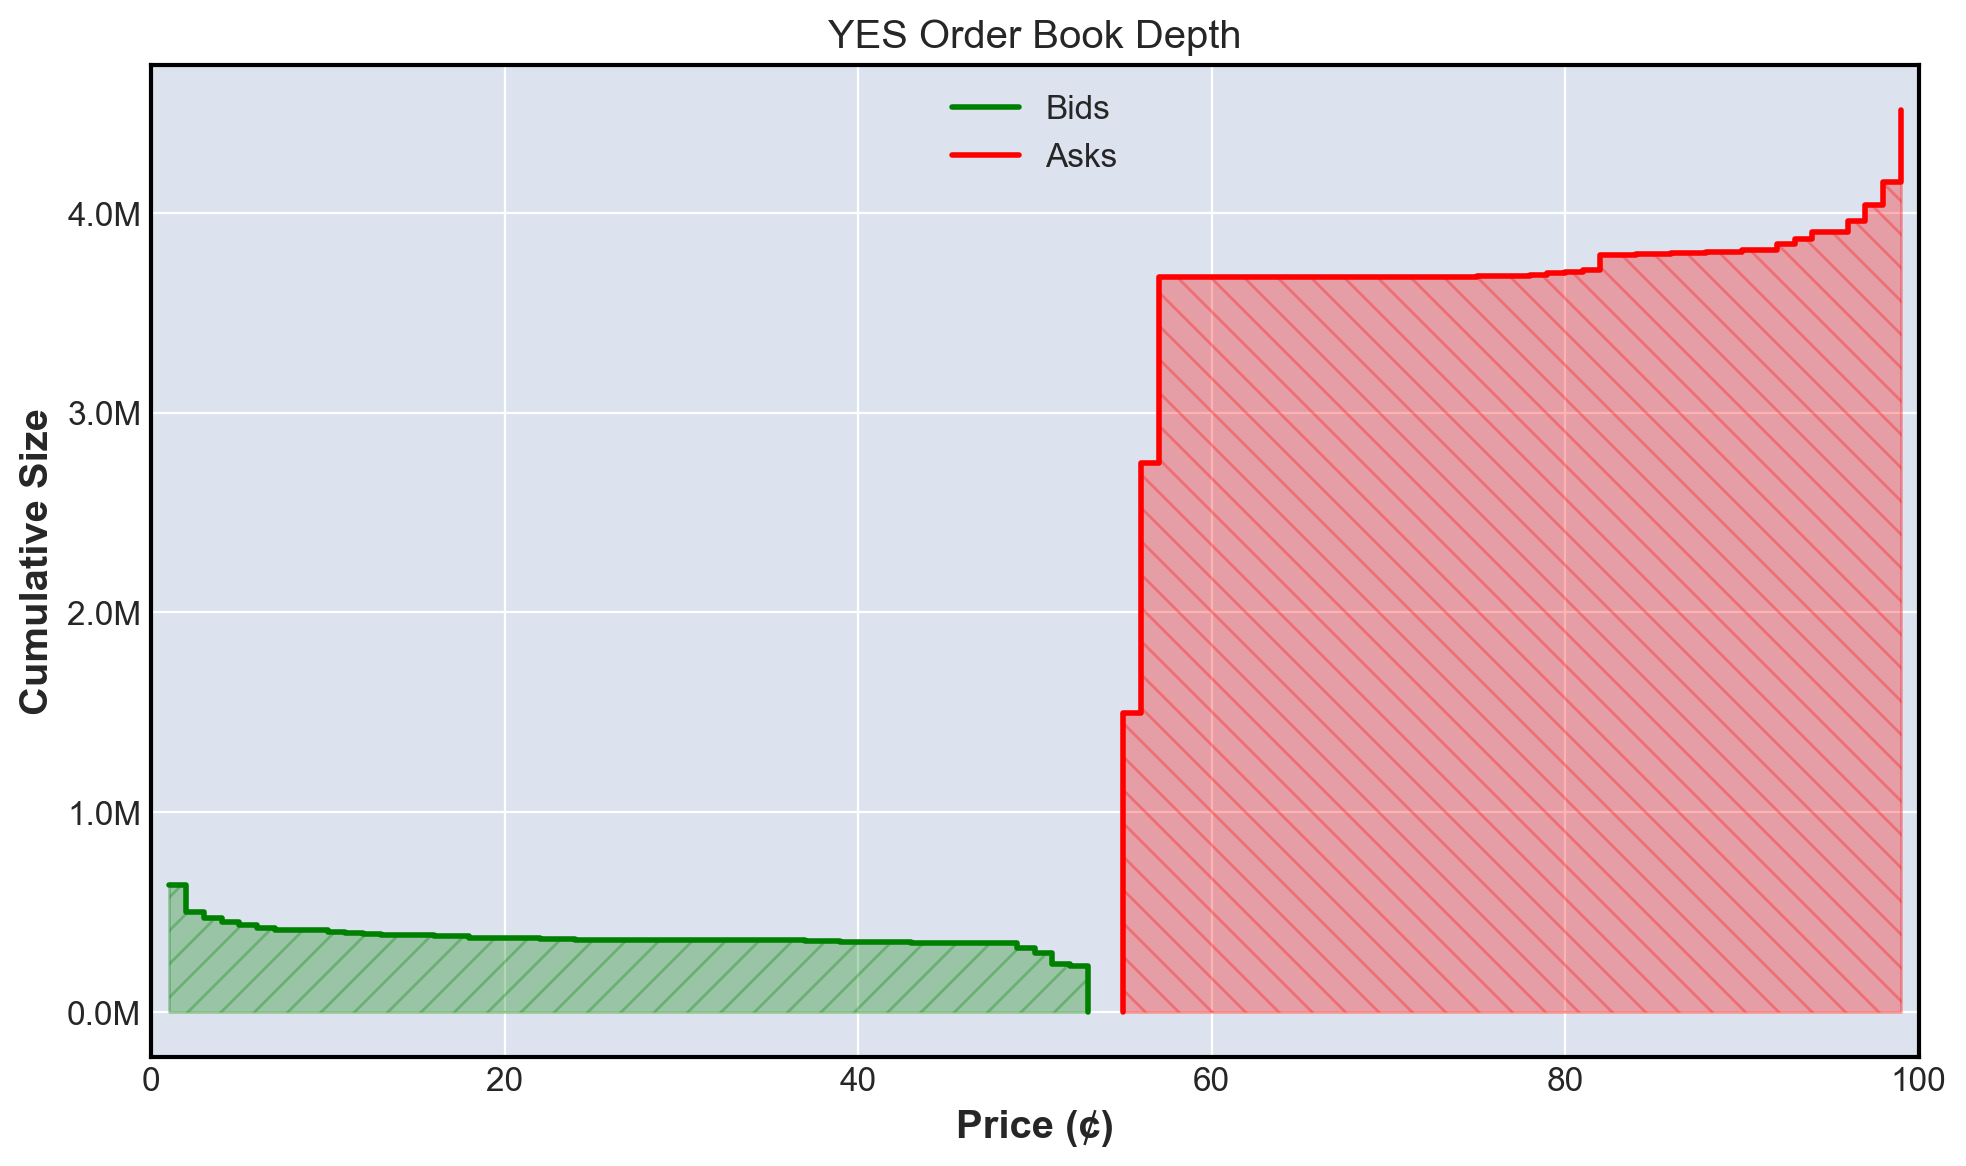

In [98]:
plot_market_lob("KXWMENSINGLES-25-CA")

In [ ]:
import time
import os

def live_market_lob(ticker, refresh_interval=1):
    try:
        while True:
            # Clear the console (cross-platform)
            os.system('cls' if os.name == 'nt' else 'clear')

            # Fetch and print the updated orderbook
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            print(f"Live YES Order Book for {ticker} — refreshed at {time.strftime('%H:%M:%S')}\n")

            print("Bids:")
            for price, qty in yes_bids:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            print("\nAsks:")
            for price, qty in yes_asks:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            time.sleep(refresh_interval)

    except KeyboardInterrupt:
        print("\nStopped.")

In [103]:
import time
from IPython.display import clear_output

def live_market_lob_notebook(ticker, refresh_interval=1):
    try:
        while True:
            # Clear current cell output
            clear_output(wait=True)

            # Fetch and format the orderbook
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            print(f"Live YES Order Book for {ticker} — refreshed at {time.strftime('%H:%M:%S')}\n")

            print("Bids:")
            for price, qty in yes_bids:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            print("\nAsks:")
            for price, qty in yes_asks:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            time.sleep(refresh_interval)

    except KeyboardInterrupt:
        print("\nStopped.")


In [105]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

def live_plot_market_lob(ticker, refresh_interval=1):
    try:
        while True:
            # Get and format orderbook
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            ask_prices = [p for p, _ in yes_asks]
            ask_sizes = [q for _, q in yes_asks]
            ask_cum = list(np.cumsum(ask_sizes))

            bid_prices = [p for p, _ in yes_bids]
            bid_sizes = [q for _, q in yes_bids]
            bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

            # Extend gracefully to 0 at same price
            bid_prices_ext = bid_prices + [bid_prices[-1]]
            bid_cum_ext = bid_cum + [0]
            ask_prices_ext = [ask_prices[0]] + ask_prices
            ask_cum_ext = [0] + ask_cum

            # Clear and plot
            clear_output(wait=True)
            plt.figure(figsize=(10, 6))
            plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
            plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

            plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
            plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

            # Format y-axis with K/M
            import matplotlib.ticker as mticker
            max_val = max(max(bid_cum_ext, default=0), max(ask_cum_ext, default=0))
            if max_val >= 1_000_000:
                divisor = 1_000_000
                suffix = "M"
            elif max_val >= 1_000:
                divisor = 1_000
                suffix = "K"
            else:
                divisor = 1
                suffix = ""
            plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

            plt.xlabel("Price (¢)")
            plt.ylabel("Cumulative Size")
            plt.title(f"YES Order Book Depth — {ticker} ({time.strftime('%H:%M:%S')})")
            plt.legend(loc="upper center")
            plt.xlim(0, 100)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            time.sleep(refresh_interval)

    except KeyboardInterrupt:
        clear_output(wait=True)
        print("Live plot stopped.")


In [104]:
live_market_lob_notebook("KXFEDDECISION-25JUL-C25")


Live YES Order Book for KXFEDDECISION-25JUL-C25 — refreshed at 20:46:39

Bids:
  YES @ 1¢ × 1,010,500 contracts
  YES @ 2¢ × 708,096 contracts
  YES @ 3¢ × 505,385 contracts
  YES @ 4¢ × 568,224 contracts

Asks:
  YES @ 6¢ × 874,197 contracts
  YES @ 7¢ × 703,652 contracts
  YES @ 8¢ × 7,500 contracts
  YES @ 9¢ × 4,959 contracts
  YES @ 10¢ × 161 contracts
  YES @ 11¢ × 1,000 contracts
  YES @ 12¢ × 18,374 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 385 contracts
  YES @ 16¢ × 7,599 contracts
  YES @ 17¢ × 1,069 contracts
  YES @ 18¢ × 1,261 contracts
  YES @ 19¢ × 1,625 contracts
  YES @ 20¢ × 1,902 contracts
  YES @ 21¢ × 2,095 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5,000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 29¢ × 50 contracts
  YES @ 35¢ × 1 contracts
  YES @ 44¢ × 500 contracts
  YES @ 48¢ × 107 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22,550 contracts
  YES @ 55¢ × 1,500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2,000 contracts
  

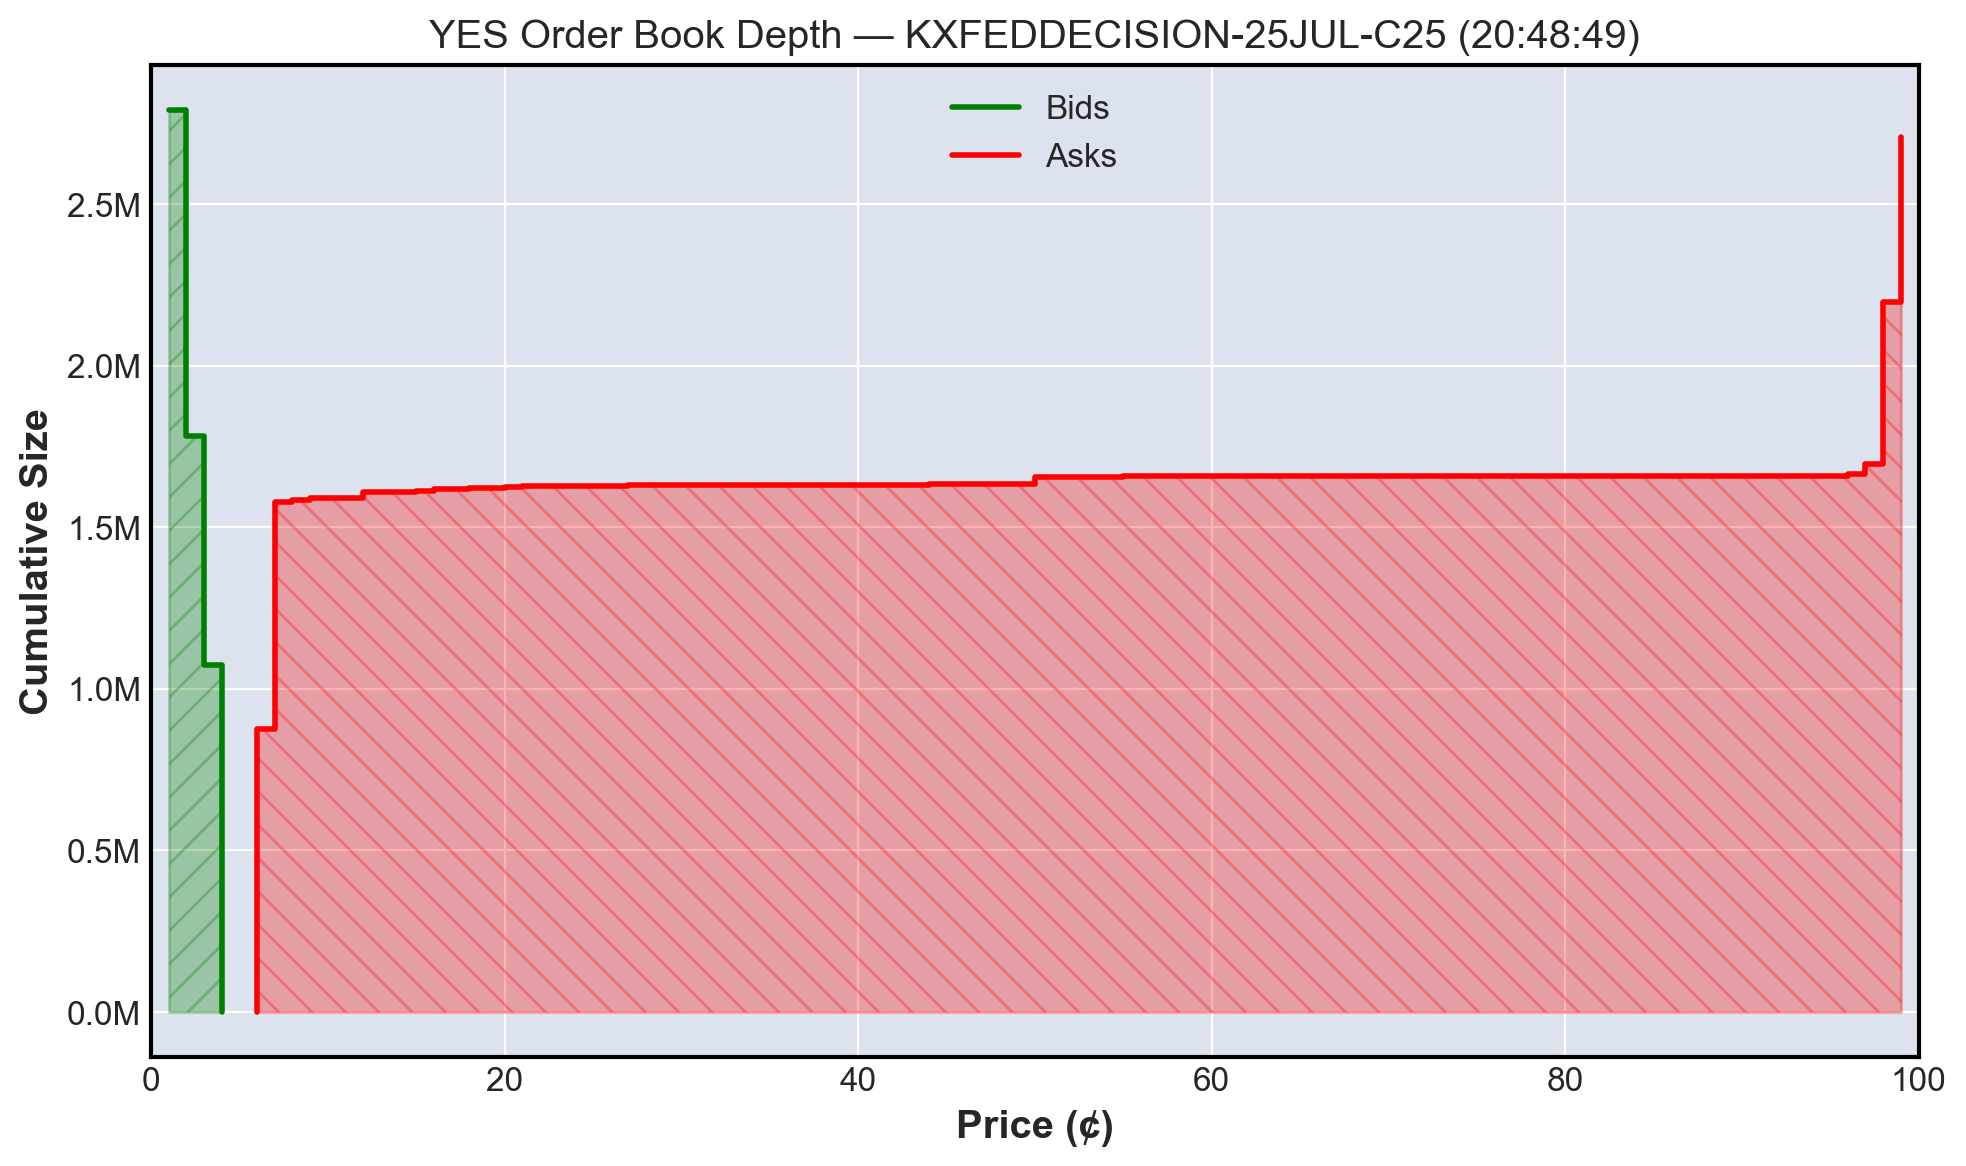

In [ ]:
live_plot_market_lob("KXFEDDECISION-25JUL-C25")

In [89]:
open_mkts.sort_values(by='volume', ascending=False)

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.House Winner,custom_strike.President Winner,custom_strike.Senate Winner,custom_strike.Disease,custom_strike.Chemical,custom_strike.Cryptocurrency,custom_strike.Chamber of Congress,custom_strike.Public Health Emergency/Pandemic,fee_waiver_expiration_time,custom_strike.Chart
5608,KXFEDDECISION-25JUL-C25,KXFEDDECISION-25JUL,binary,Will the Federal Reserve Cut rates by 25bps at...,Cut 25bps,Cut 25bps,Cut 25bps,2025-06-18T14:00:00Z,2025-07-30T17:55:00Z,2025-07-30T18:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5606,KXFEDDECISION-25JUL-H0,KXFEDDECISION-25JUL,binary,Will the Federal Reserve Hike rates by 0bps at...,Hike 0bps,Fed maintains rate,Fed maintains rate,2025-06-18T14:00:00Z,2025-07-30T17:55:00Z,2025-07-30T18:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8931,KXWMENSINGLES-25-CA,KXWMENSINGLES-25,binary,Will the Carlos Alcaraz win the 2025 Wimbledon?,,Carlos Alcaraz,Carlos Alcaraz,2025-02-11T15:00:00Z,2027-07-13T14:00:00Z,2025-07-13T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8930,KXWMENSINGLES-25-JS,KXWMENSINGLES-25,binary,Will the Jannik Sinner win the 2025 Wimbledon?,,Jannik Sinner,Jannik Sinner,2025-02-11T15:00:00Z,2027-07-13T14:00:00Z,2025-07-13T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5607,KXFEDDECISION-25JUL-C26,KXFEDDECISION-25JUL,binary,Will the Federal Reserve Cut rates by >25bps a...,Cut >25bps,Cut >25bps,Cut >25bps,2025-06-18T14:00:00Z,2025-07-30T17:55:00Z,2025-07-30T18:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,KXTHEOPEN-25-TOLE,KXTHEOPEN-25,binary,Will the Thorbjorn Olesen win the The Open Cha...,,Thorbjorn Olesen,Thorbjorn Olesen,2025-07-11T18:30:00Z,2027-07-20T14:00:00Z,2025-07-20T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,KXTHEOPEN-25-ANOV,KXTHEOPEN-25,binary,Will the Andrew Novak win the The Open Champio...,,Andrew Novak,Andrew Novak,2025-07-11T18:30:00Z,2027-07-20T14:00:00Z,2025-07-20T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,KXTHEOPEN-25-NNOR,KXTHEOPEN-25,binary,Will the Niklas Norgaard Moller win the The Op...,,Niklas Norgaard Moller,Niklas Norgaard Moller,2025-07-11T18:30:00Z,2027-07-20T14:00:00Z,2025-07-20T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,KXTHEOPEN-25-JNIE,KXTHEOPEN-25,binary,Will the Joaquin Niemann win the The Open Cham...,,Joaquin Niemann,Joaquin Niemann,2025-07-11T18:30:00Z,2027-07-20T14:00:00Z,2025-07-20T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# import time
# import pandas as pd
# from datetime import datetime

# def record_orderbook_time_series(ticker, duration_secs=60, sleep_secs=1):
#     price_levels = list(range(0, 101))  # YES prices from 0 to 100

#     # Create storage: one DataFrame for bids, one for asks
#     bids_df = pd.DataFrame(columns=price_levels)
#     asks_df = pd.DataFrame(columns=price_levels)

#     start_time = time.time()

#     try:
#         while time.time() - start_time < duration_secs:
#             now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')

#             # Fetch orderbook
#             orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
#             yes_bids = orderbook["yes"]
#             yes_asks = [[100 - price, size] for price, size in orderbook["no"]]

#             # Create blank snapshots
#             bid_snapshot = {p: 0 for p in price_levels}
#             ask_snapshot = {p: 0 for p in price_levels}

#             # Fill in only prices with non-zero size
#             for price, size in yes_bids:
#                 bid_snapshot[price] = size
#             for price, size in yes_asks:
#                 ask_snapshot[price] = size

#             # Append to dataframes
#             bids_df.loc[now] = bid_snapshot
#             asks_df.loc[now] = ask_snapshot

#             time.sleep(sleep_secs)

#     except KeyboardInterrupt:
#         print("Stopped by user.")

#     # Compute size in megabytes
#     total_bytes = bids_df.memory_usage(deep=True).sum() + asks_df.memory_usage(deep=True).sum()
#     size_mb = total_bytes / (1024 ** 2)

#     print(f"\nRecording complete: {len(bids_df)} snapshots collected.")
#     print(f"Total memory used: {size_mb:.2f} MB")

#     return bids_df, asks_df

In [119]:
def record_orderbook_time_series(ticker, duration_secs=60, interval_secs=1.0):
    import time
    from datetime import datetime
    import pandas as pd

    price_levels = list(range(0, 101))
    bids_df = pd.DataFrame(columns=price_levels)
    asks_df = pd.DataFrame(columns=price_levels)

    start_time = time.time()
    snapshot_count = 0

    try:
        while time.time() - start_time < duration_secs:
            loop_start = time.time()

            # Fetch and parse orderbook
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = orderbook["yes"]
            yes_asks = [[100 - price, size] for price, size in orderbook["no"]]

            bid_snapshot = {p: 0 for p in price_levels}
            ask_snapshot = {p: 0 for p in price_levels}

            for price, size in yes_bids:
                bid_snapshot[price] = size
            for price, size in yes_asks:
                ask_snapshot[price] = size

            now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
            bids_df.loc[now] = bid_snapshot
            asks_df.loc[now] = ask_snapshot

            snapshot_count += 1

            elapsed = time.time() - loop_start
            remaining = max(0, interval_secs - elapsed)
            time.sleep(remaining)

    except KeyboardInterrupt:
        print("Stopped by user.")

    total_bytes = bids_df.memory_usage(deep=True).sum() + asks_df.memory_usage(deep=True).sum()
    size_mb = total_bytes / (1024 ** 2)

    print(f"\nRecording complete: {snapshot_count} snapshots collected.")
    print(f"Total memory used: {size_mb:.2f} MB")

    return bids_df, asks_df

In [120]:
bids_ts, asks_ts = record_orderbook_time_series("KXFEDDECISION-25JUL-C25", duration_secs=180, interval_secs=5)


Recording complete: 36 snapshots collected.
Total memory used: 0.06 MB


In [121]:
asks_ts

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
2025-07-12 01:05:20.923,0,0,0,0,0,0,873991,701223,7500,5132,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:05:25.927,0,0,0,0,0,0,873991,701223,7500,5132,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:05:30.922,0,0,0,0,0,0,873991,704959,7500,5459,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:05:35.978,0,0,0,0,0,0,873991,704959,7500,5459,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:05:40.918,0,0,0,0,0,0,873991,704959,7500,5459,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:05:45.949,0,0,0,0,0,0,873991,704959,7500,5459,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:05:50.929,0,0,0,0,0,0,873991,704959,7500,5459,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:05:55.979,0,0,0,0,0,0,873991,704959,7500,5459,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:06:00.930,0,0,0,0,0,0,873991,705132,7500,5459,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 01:06:05.931,0,0,0,0,0,0,873991,705132,7500,5459,...,0,0,0,0,902,4000,30700,503000,509000,0
